In [1]:
# Importing the different libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pylab
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.figure_factory as ff
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
!pip install pingouin
import pingouin as pg
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
# Using pandas to load the dataset

df = pd.read_csv('diabetes.csv')

In [3]:
# Setting the display.max rows options to look at the entire dataset

pd.set_option('display.max_rows', 768)

In [4]:
# Printing the dataset & doing an initial sweep of the dataset

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
18             1      103             30             38       83  43.3   
19             1      115             70             30       96  34.6   
20             3      126             88             41      235  39.3   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
23             9      119             80             35        0  29.0   
24            11      143             94             33      146  36.6   
25            10      125             70             26      115  31.1   
26             7      147             76              0        0  39.4   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
29             5      117             92              0        0  34.1   
30             5      109             75             26        0  36.0   
31             3      158             76             36      245  31.6   
32             3       88             58             11       54  24.8   
33             6       92             92              0        0  19.9   
34            10      122             78             31        0  27.6   
35             4      103             60             33      192  24.0   
36            11      138             76              0        0  33.2   
37             9      102             76             37        0  32.9   
38             2       90             68             42        0  38.2   
39             4      111             72             47      207  37.1   
40             3      180             64             25       70  34.0   
41             7      133             84              0        0  40.2   
42             7      106             92             18        0  22.7   
43             9      171            110             24      240  45.4   
44             7      159             64              0        0  27.4   
45             0      180             66             39        0  42.0   
46             1      146             56              0        0  29.7   
47             2       71             70             27        0  28.0   
48             7      103             66             32        0  39.1   
49             7      105              0              0        0   0.0   
50             1      103             80             11       82  19.4   
51             1      101             50             15       36  24.2   
52             5       88             66             21       23  24.4   
53       

In [5]:
# Doing initial statistical analysis before conducting EDA

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.describe().var()

Pregnancies                  72820.228483
Glucose                      59408.224091
BloodPressure                63934.389466
SkinThickness                69573.807377
Insulin                     122682.482084
BMI                          68670.819983
DiabetesPedigreeFunction     73603.973327
Age                          67700.978965
Outcome                      73650.682338
dtype: float64

In [8]:
df.groupby('Outcome').median()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0                2.0    107.0           70.0           21.0     39.0  30.05   
1                4.0    140.0           74.0           27.0      0.0  34.25   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                           0.336  27.0  
1                           0.449  36.0

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
# Checking to see if there are any null values in the "Glucose" column

print("Total Missing Values/0 in Glucose Column : ", df[df.Glucose == 0].shape[0])

Total Missing Values/0 in Glucose Column :  5


In [11]:
# Checking to see if there are any null values in the "Blood Pressure" column

print("Total Missing Values/0 in Blood Pressure Column : ", df[df.BloodPressure == 0].shape[0])

Total Missing Values/0 in Blood Pressure Column :  35


In [12]:
# Checking to see if there are any null values in the "Skin Thickness" column. 

print("Total Missing Values/0 in Skin Thickness Column : ", df[df.SkinThickness == 0].shape[0])

Total Missing Values/0 in Skin Thickness Column :  227


In [13]:
# Checking to see if there are any null values in the "Insulin" column

print("Total Missing Values/0 in Insulin Column : ", df[df.Insulin == 0].shape[0])

Total Missing Values/0 in Insulin Column :  374


In [14]:
# Checking to see if there are any null values in the "BMI" column

print("Total Missing Values/0 in BMI Column : ", df[df.BMI == 0].shape[0])

Total Missing Values/0 in BMI Column :  11


In [15]:
# Checking to see if there are any null values in the "Diabetes Pedigree Function" column

print("Total Missing Values/0 in Diabetes Pedigree Function Column : ", df[df.DiabetesPedigreeFunction == 0].shape[0])

Total Missing Values/0 in Diabetes Pedigree Function Column :  0


In [16]:
# Checking to see if there are any null values in the "Age" column

print("Total Missing Values/0 in Age Column : ", df[df.Age == 0].shape[0])

Total Missing Values/0 in Age Column :  0


In [17]:
# Replacing all the missing glucose variables when outcome is 0 

df.loc[(df['Outcome'] == 0) & (df['Glucose'] == 0), 'Glucose'] = '107'

In [18]:
# Replacing all the missing glucose variables when outcome is 1

df.loc[(df['Outcome'] == 1) & (df['Glucose'] == 0), 'Glucose'] = '140'

In [19]:
# Replacing all the missing blood pressure variables when outcome is 0 

df.loc[(df['Outcome'] == 0) & (df['BloodPressure'] == 0), 'BloodPressure'] = '70'

In [20]:
# Replacing all the missing blood pressure variables when outcome is 1

df.loc[(df['Outcome'] == 1) & (df['BloodPressure'] == 0), 'BloodPressure'] = '74'

In [21]:
# Replacing all the missing skin thickness variables when outcome is 0 

df.loc[(df['Outcome'] == 0) & (df['SkinThickness'] == 0), 'SkinThickness'] = '21'

In [22]:
# Replacing all the missing skin thickness variables when outcome is 1

df.loc[(df['Outcome'] == 1) & (df['SkinThickness'] == 0), 'SkinThickness'] = '27'

In [23]:
# Replacing all the missing Insulin variables when outcome is 0 

df.loc[(df['Outcome'] == 0) & (df['Insulin'] == 0), 'Insulin'] = '39'

In [24]:
# Replacing all the missing BMI when outcome is 0

df.loc[(df['Outcome'] == 0) & (df['BMI'] == 0), 'BMI'] = '30.05'

In [25]:
# Replacing all the missing BMI variables when outcome is 1

df.loc[(df['Outcome'] == 1) & (df['BMI'] == 0), 'BMI'] = '34.25'

In [26]:
# Trying to see what type of variable glucose is

print(type('Glucose')) 

<class 'str'>


In [27]:
# Trying to see what type of variable pregnancies is

print(type('Pregnancies')) 

<class 'str'>


In [28]:
# Trying to see what type of variable bloodpressure is

print(type('BloodPressure')) 

<class 'str'>


In [29]:
# Trying to see what type of variable skinthickness is


print(type('SkinThickness')) 

<class 'str'>


In [30]:
# Trying to see what type of variable insulin is

print(type('Insulin')) 

<class 'str'>


In [31]:
# Trying to see what type of variable BMI is

print(type('BMI')) 

<class 'str'>


In [32]:
# Converting string into integer so that we are able to perform calculations on it

df['Glucose'] = df['Glucose'].astype(int)

In [33]:
# Converting string into integer so that we are able to perform calculations on it

df['BloodPressure'] = df['BloodPressure'].astype(int)

In [34]:
# Converting string into integer so that we are able to perform calculations on it

df['SkinThickness'] = df['SkinThickness'].astype(int)

In [35]:
# Converting string into integer so that we are able to perform calculations on it

df['Insulin'] = df['Insulin'].astype(int)

In [36]:
# Another way to converting string to an integer

df = df.apply(pd.to_numeric, errors='ignore')

In [37]:
# Exploratory Data Analaysis 

In [38]:
# Checking to see if the dataset is normally distributed beween people who have diabetes and those who do not.
# Majority of the people in the dataset do not have diabetes - unevenly distributed

fig = px.histogram(df, x="Outcome",hover_data=df.columns, color="Outcome")
fig.update_layout(bargap=0.2)
fig.show()

In [39]:
# Glucose

In [40]:
# Histogram and boxplot for glucose

fig = px.histogram(df, x="Glucose",hover_data=df.columns, marginal= "box")
fig.update_layout(bargap=0.2)
fig.show()

In [41]:
# Density plot with normal distribution for glucose

b = df['Glucose']

hist_data = [b]
group_labels = ['Glucose'] 

fig = ff.create_distplot(hist_data, group_labels, curve_type='normal')
fig.show()

In [42]:
shapiro_test = stats.shapiro(df['Glucose'])
shapiro_test

ShapiroResult(statistic=0.9697533249855042, pvalue=1.6375369810139873e-11)

In [43]:
# Blood pressure

In [44]:
# Histogram and boxplot for blood pressure

fig = px.histogram(df, x="BloodPressure", hover_data=df.columns, marginal= "box")
fig.update_layout(bargap=0.2)
fig.show()

In [45]:
# Density plot and normal distrubution for blood pressure

b = df['BloodPressure']

hist_data = [b]
group_labels = ['Blood Pressure'] 

fig = ff.create_distplot(hist_data, group_labels, curve_type='normal')
fig.show()

In [46]:
shapiro_test = stats.shapiro(df['BloodPressure'])
shapiro_test

ShapiroResult(statistic=0.9880667328834534, pvalue=6.635423687839648e-06)

In [47]:
#BMI

In [48]:
# Histogram and box plot for BMI 

fig = px.histogram(df, x="BMI", hover_data=df.columns, marginal= "box")
fig.update_layout(bargap=0.2)
fig.show()

In [49]:
# Density and normal distribution for the BMI column

e = df['BMI']

hist_data = [e]
group_labels = ['BMI'] 

fig = ff.create_distplot(hist_data, group_labels, curve_type='normal')
fig.show()

In [50]:
shapiro_test = stats.shapiro(df['BMI'])
shapiro_test

ShapiroResult(statistic=0.9791825413703918, pvalue=5.3711755043650555e-09)

In [51]:
#Age

In [52]:
# Histogram and box plot for Age

fig = px.histogram(df, x="Age", hover_data=df.columns, marginal= "box")
fig.update_layout(bargap=0.2)
fig.show()

In [53]:
shapiro_test = stats.shapiro(df['Age'])
shapiro_test

ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)

In [54]:
# Histogram and box plot for Age

fig = px.histogram(df, x="Pregnancies", hover_data=df.columns, marginal= "box")
fig.update_layout(bargap=0.2)
fig.show()

In [55]:
shapiro_test = stats.shapiro(df['Pregnancies'])
shapiro_test

ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)

In [56]:
df.var()

Pregnancies                    11.354056
Glucose                       928.065080
BloodPressure                 146.517260
SkinThickness                  86.889625
Insulin                     11690.180078
BMI                            47.343538
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

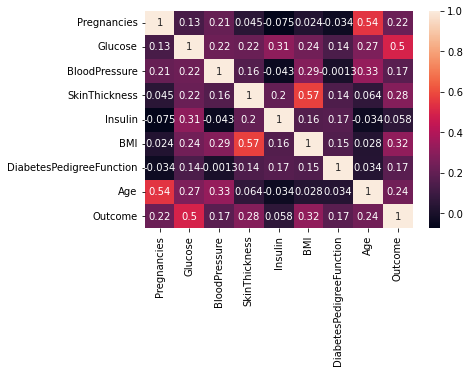

In [57]:
# Heatmap

corr = df.corr()
a = sns.heatmap(corr, annot = True)

In [58]:
df.cov()

Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.360591       8.530756   
Glucose                     13.360591   928.065080      82.852632   
BloodPressure                8.530756    82.852632     146.517260   
SkinThickness                1.400636    61.157608      18.013797   
Insulin                    -27.153483  1017.982263     -56.439507   
BMI                          0.553828    49.515987      23.815358   
DiabetesPedigreeFunction    -0.037426     1.396489      -0.005359   
Age                         21.570620    96.341251      46.307565   
Outcome                      0.356618     7.206704       1.000591   

                          SkinThickness       Insulin         BMI  \
Pregnancies                    1.400636    -27.153483    0.553828   
Glucose                       61.157608   1017.982263   49.515987   
BloodPressure                 18.013797    -56.439507   23.815358   
SkinThickness                 86.889625    206.029393   36.765545   
Insulin                      206.029393  11690.180078  117.066598   
BMI                           36.765545    117.066598   47.343538   
DiabetesPedigreeFunction       0.446409      5.936148    0.348300   
Age                            6.999044    -42.847475    2.255443   
Outcome                        1.257490      2.988171    1.035736   

                          DiabetesPedigreeFunction         Age   Outcome  
Pregnancies                              -0.037426   21.570620  0.356618  
Glucose                                   1.396489   96.341251  7.206704  
BloodPressure                            -0.005359   46.307565  1.000591  
SkinThickness                             0.446409    6.999044  1.257490  
Insulin                                   5.936148  -42.847475  2.988171  
BMI                                       0.348300    2.255443  1.035736  
DiabetesPedigreeFunction                  0.109779    0.130772  0.027472  
Age                                       0.130772  138.303046  1.336953  
Outcome                                   0.027472    1.336953  0.227483

In [59]:
cv = lambda x: np.std(x,ddof=1)/ np.mean(x)*100

In [60]:
df.apply(cv)

Pregnancies                  87.634133
Glucose                      25.036893
BloodPressure                16.723700
SkinThickness                33.981495
Insulin                     117.799734
BMI                          21.214408
DiabetesPedigreeFunction     70.215138
Age                          35.378816
Outcome                     136.678604
dtype: float64

In [61]:
# ANOVA

In [62]:
# Labelling the numerical to categorical data

labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

In [63]:
# Creating a categorical column for BMI

df['BMI_Bin'] = pd.qcut(df['BMI'], q = 4, precision = 1, labels = labels)

In [64]:
# Computing the t-test statistic

tStat, pValue = stats.ttest_ind(df['BMI'], df['BloodPressure'], equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0 T-Statistic:-79.50563227894253


In [65]:
# Hypothesis 2: BMI and Blood Pressure

<AxesSubplot:title={'center':'BloodPressure'}, xlabel='BMI_Bin'>

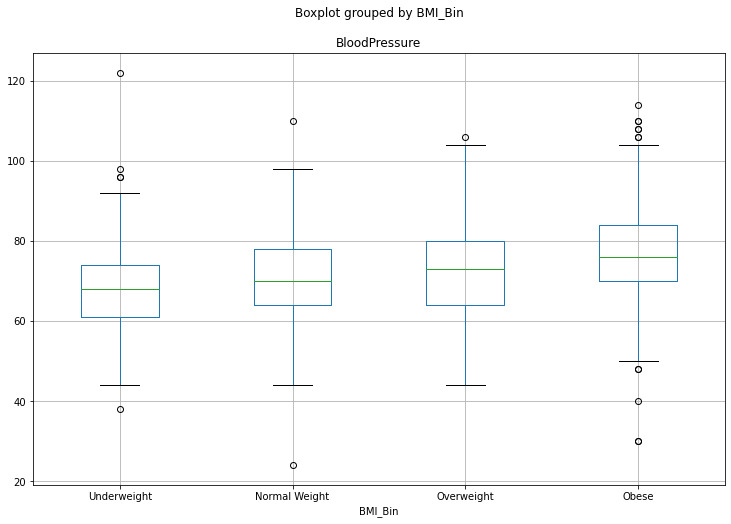

In [66]:
# Boxplot to vizualize

df.boxplot('BloodPressure', by='BMI_Bin', figsize=(12, 8))

0.2859449044205612


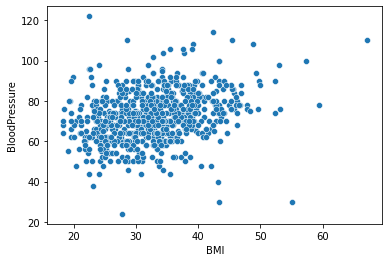

In [67]:
# Scatterplot for BMI and blood pressure to vizualize

sns.scatterplot(data=df, x="BMI", y="BloodPressure")
cor = df['BMI'].corr(df['BloodPressure'])
print(cor)

<AxesSubplot:xlabel='BMI_Bin', ylabel='BloodPressure'>

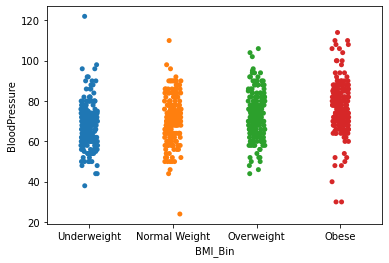

In [68]:
sns.stripplot(x = 'BMI_Bin', y = 'BloodPressure', data = df)

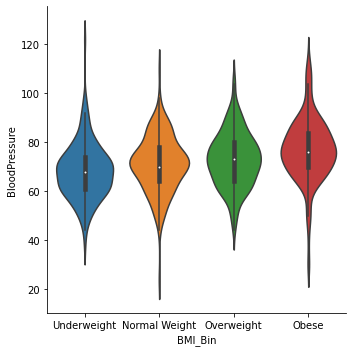

In [69]:
sns.catplot(x = 'BMI_Bin', y = 'BloodPressure', data = df, kind = 'violin')

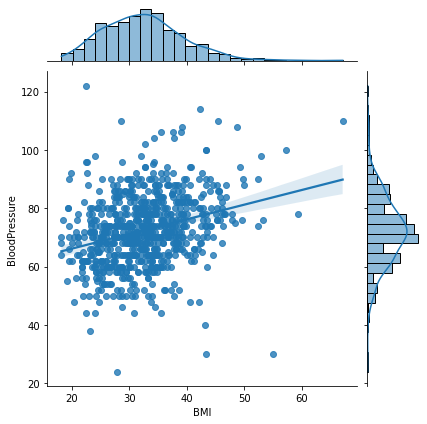

In [70]:
sns.jointplot(x ='BMI', y = 'BloodPressure', data = df, kind = 'reg')

In [71]:
# Multiple linear regression model

fig = px.scatter(df, y = 'BloodPressure', x = 'BMI', opacity = 0.8, trendline = 'ols', 
                 trendline_color_override = 'red')
fig.show()

In [72]:
# Multiple linear regresison model

import plotly.graph_objects as go

X = df.BMI.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.BloodPressure)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='BMI', y='BloodPressure', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [73]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['BMI'], df['BloodPressure'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.286


In [74]:
# ANOVA analysis for blood pressure and BMI

mod = ols('BloodPressure ~ BMI_Bin',data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df          F        PR(>F)
BMI_Bin     8001.567157    3.0  19.522779  3.336856e-12
Residual  104377.171124  764.0        NaN           NaN


In [75]:
stats.levene(df['BMI'], df['BloodPressure'], center = 'mean')

LeveneResult(statistic=145.14749559978713, pvalue=5.279145367044719e-32)

In [76]:
# Independent t-test

stats.ttest_ind(df['BMI'], df['BloodPressure'])

Ttest_indResult(statistic=-79.50563227894253, pvalue=0.0)

In [77]:
# ANOVA analysis for blood pressure and BMI

aov = pg.anova(data=df, dv='BloodPressure', between='BMI_Bin', detailed=True)
print(aov)

    Source             SS   DF           MS          F         p-unc       np2
0  BMI_Bin    8001.567157    3  2667.189052  19.522779  3.336856e-12  0.071202
1   Within  104377.171124  764   136.619334        NaN           NaN       NaN


In [78]:
# Post-hoc test

pt = pg.pairwise_tukey(dv='BloodPressure', between='BMI_Bin', effsize = 'cohen', data=df)
print(pt)

               A              B    mean(A)    mean(B)      diff        se  \
0    Underweight  Normal Weight  68.191710  71.240838 -3.049128  1.192961   
1    Underweight     Overweight  68.191710  73.030612 -4.838902  1.185289   
2    Underweight          Obese  68.191710  77.154255 -8.962545  1.197736   
3  Normal Weight     Overweight  71.240838  73.030612 -1.789775  1.188411   
4  Normal Weight          Obese  71.240838  77.154255 -5.913418  1.200826   
5     Overweight          Obese  73.030612  77.154255 -4.123643  1.193204   

          T       p-tukey     cohen  
0 -2.555932  5.252499e-02 -0.260867  
1 -4.082467  2.870681e-04 -0.413991  
2 -7.482908  1.400213e-12 -0.766788  
3 -1.506023  4.343338e-01 -0.153124  
4 -4.924458  6.175381e-06 -0.505921  
5 -3.455941  3.238481e-03 -0.352797  


In [79]:
# Post-hoc test

tukey = pairwise_tukeyhsd(endog = df['BloodPressure'], groups = df['BMI_Bin'], alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2   meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
Normal Weight       Obese   5.9134    0.0   2.8217  9.0052   True
Normal Weight  Overweight   1.7898 0.4343    -1.27  4.8496  False
Normal Weight Underweight  -3.0491 0.0525  -6.1206  0.0224  False
        Obese  Overweight  -4.1236 0.0032  -7.1958 -1.0515   True
        Obese Underweight  -8.9625    0.0 -12.0463 -5.8787   True
   Overweight Underweight  -4.8389 0.0003  -7.8907 -1.7871   True
-----------------------------------------------------------------


In [80]:
# ANCOVA while controlling for the Age and Insulin variables

from pingouin import ancova 

ancova(data = df, dv='BloodPressure', covar = ['Age', 'Insulin'], between='BMI_Bin')

Source            SS   DF          F         p-unc       np2
0   BMI_Bin   7850.261655    3  21.551793  2.092893e-13  0.078213
1       Age  10984.617217    1  90.470180  2.395049e-20  0.106127
2   Insulin    637.194521    1   5.247985  2.224440e-02  0.006840
3  Residual  92519.748830  762        NaN           NaN       NaN

In [81]:
# Multiple linear regression model for BMI and glucose

In [82]:
X = df[['BMI']]
y = df['BloodPressure']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI      0.49615

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
df1 = pd.DataFrame({'Actual BloodPressure': y_test, 'Predicted BloodPressure': y_pred})

In [88]:
df1

Actual BloodPressure  Predicted BloodPressure
661                    76                77.725104
122                    74                73.110909
113                    62                73.309369
14                     72                69.240939
529                    65                68.645559
103                    72                69.637859
338                    78                73.408599
588                    86                72.962064
395                    58                70.183624
204                    72                75.145124
31                     76                72.118609
546                    76                78.072409
278                    74                68.794404
593                    52                70.580544
737                    72                72.317069
202                    68                69.985164
175                    72                72.664374
55                     50                67.851718
479                    86                70.332469
365                    54                73.309369
417                    82                75.542044
577                    80                77.725104
172                    70                70.779004
352                    82                73.507829
27                     66                67.950948
605                    60                74.202439
239                    76                65.569428
744                    88                76.583959
79                     66                68.844019
496                    68                69.340169
285                    74                69.340169
422                    64                76.583959
640                    86                70.977464
374                    52                74.400899
385                    54                67.504413
404                    64                72.763604
648                    84                70.481314
500                    90                68.943249
575                    44                74.053594
40                     64                73.309369
181                    64                73.755904
354                    78                77.625874
563                    60                69.786704
399                    70                73.755904
8                      70                71.572844
145                    75                71.349576
271                    62                68.943249
419                    64                69.538629
198                    64                73.706289
683                    80                72.465914
578                    68                69.836319
142                    52                72.565144
215                    70                77.179339
756                    90                72.317069
452                    68                76.236654
75                     48                68.695174
1                      66                69.637859
303                    98                82.686605
451                    70                70.779004
706                    74                73.433406
662                   106                75.095509
364                    74                73.755904
626                    68                68.695174
266                    74                74.450514
317                    74                71.572844
408                    74                69.290554
355                    88                71.523229
272                    78                67.851718
250                    52                71.920149
403                    78                72.118609
624                    64                71.721689
222                    70                68.943249
253                    68                74.202439
622                    94                76.683189
235                    72                78.072409
351                    84                71.920149
672                   106                74.053594
499                    74  

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.042854318976289
Mean Squared Error: 143.00593518892643
Root Mean Squared Error: 11.958508903242345


In [90]:
# Hypothesis 1

<AxesSubplot:title={'center':'Glucose'}, xlabel='BMI_Bin'>

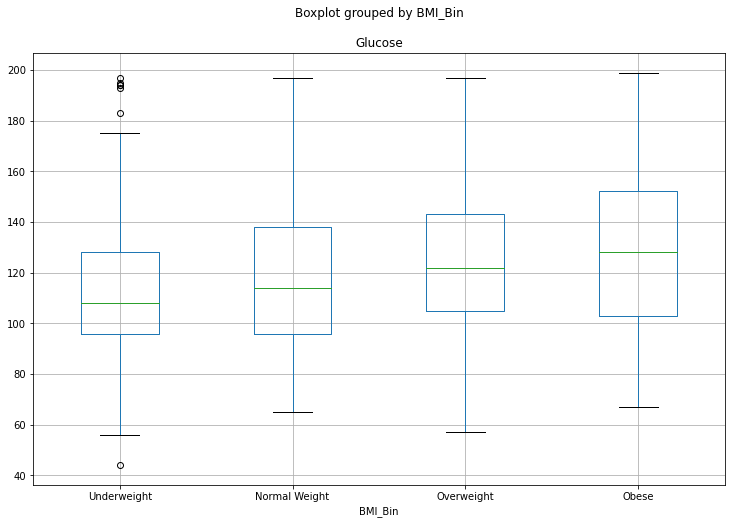

In [91]:
# Vizualizing BMI and Glucose ANOVA 

df.boxplot('Glucose', by='BMI_Bin', figsize=(12, 8))

In [92]:
# Independent t-test

tStat, pValue = stats.ttest_ind(df['BMI'], df['Glucose'], equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0 T-Statistic:-79.18852892246551


0.23622500518126743


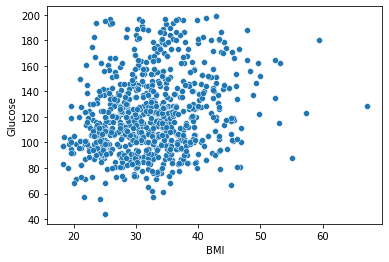

In [93]:
sns.scatterplot(data=df, x="BMI", y="Glucose")
cor = df['BMI'].corr(df['Glucose'])
print(cor)

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



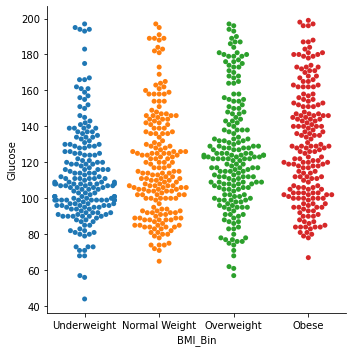

In [94]:
sns.catplot(x = 'BMI_Bin', y = 'Glucose', data = df, kind = 'swarm')

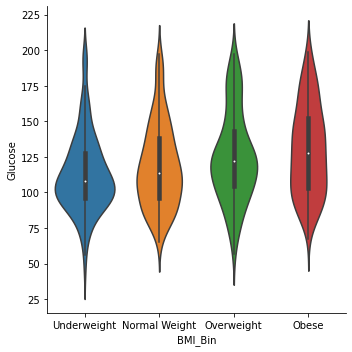

In [95]:
sns.catplot(x = 'BMI_Bin', y = 'Glucose', data = df, kind = 'violin')

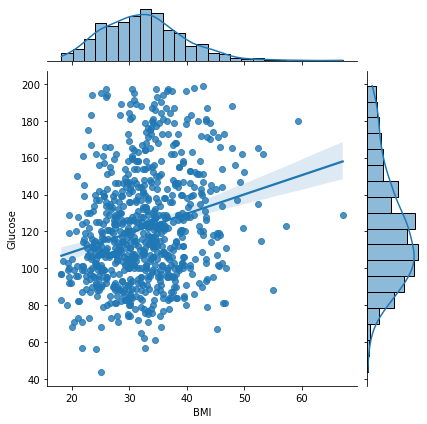

In [96]:
sns.jointplot(x ='BMI', y = 'Glucose', data = df, kind = 'reg')

In [97]:
# Multiple Linear regression

fig = px.scatter(df, y = 'Glucose', x = 'BMI', opacity = 0.8, trendline = 'ols', 
                 trendline_color_override = 'red')
fig.show()

In [98]:
# Multiple linear regression

X = df.BMI.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.Glucose)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='BMI', y='Glucose', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [99]:
corr, _ = pearsonr(df['BMI'], df['Glucose'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.236


In [100]:
# Analyzing ANOVA distribution

mod = ols('Glucose ~ BMI_Bin',data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df          F        PR(>F)
BMI_Bin    30960.552770    3.0  11.580294  1.984752e-07
Residual  680865.363896  764.0        NaN           NaN


In [101]:
stats.ttest_ind(df['BMI'], df['Glucose'])

Ttest_indResult(statistic=-79.18852892246551, pvalue=0.0)

In [102]:
# Analyzing ANOVA distribution

aov = pg.anova(data=df, dv='Glucose', between='BMI_Bin', detailed=True)
print(aov)

    Source             SS   DF            MS          F         p-unc  \
0  BMI_Bin   30960.552770    3  10320.184257  11.580294  1.984752e-07   
1   Within  680865.363896  764    891.185031        NaN           NaN   

        np2  
0  0.043495  
1       NaN  


In [103]:
# Post-hoc test 

pt = pg.pairwise_tukey(dv='Glucose', between='BMI_Bin', effsize = 'cohen', data=df)
print(pt)

               A              B     mean(A)     mean(B)       diff        se  \
0    Underweight  Normal Weight  112.989637  118.879581  -5.889944  3.046872   
1    Underweight     Overweight  112.989637  125.107143 -12.117506  3.027276   
2    Underweight          Obese  112.989637  129.861702 -16.872065  3.059066   
3  Normal Weight     Overweight  118.879581  125.107143  -6.227562  3.035252   
4  Normal Weight          Obese  118.879581  129.861702 -10.982121  3.066959   
5     Overweight          Obese  125.107143  129.861702  -4.754559  3.047492   

          T       p-tukey     cohen  
0 -1.933112  2.150299e-01 -0.197300  
1 -4.002775  3.989999e-04 -0.405910  
2 -5.515430  2.850554e-07 -0.565177  
3 -2.051745  1.701701e-01 -0.208610  
4 -3.580785  2.060310e-03 -0.367877  
5 -1.560155  4.021934e-01 -0.159267  


In [104]:
tukey = pairwise_tukeyhsd(endog = df['Glucose'], groups = df['BMI_Bin'], alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2   meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
Normal Weight       Obese  10.9821 0.0021   3.0856 18.8786   True
Normal Weight  Overweight   6.2276 0.1702  -1.5873 14.0424  False
Normal Weight Underweight  -5.8899  0.215 -13.7347  1.9548  False
        Obese  Overweight  -4.7546 0.4022 -12.6009  3.0918  False
        Obese Underweight -16.8721    0.0 -24.7482 -8.9959   True
   Overweight Underweight -12.1175 0.0004 -19.9118 -4.3232   True
-----------------------------------------------------------------


In [105]:
# ANCOVA while controlling for the pregnancies variables

ancova(data = df, dv='Glucose', covar = ['Pregnancies'], between='BMI_Bin')

Source             SS   DF          F         p-unc       np2
0      BMI_Bin   29130.486013    3  11.047489  4.178075e-07  0.041629
1  Pregnancies   10228.498177    1  11.637213  6.804858e-04  0.015023
2     Residual  670636.865720  763        NaN           NaN       NaN

In [106]:
# Multiple linear regression model 

In [107]:
X = df[['BMI']]
y = df['Glucose']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI     1.114194

In [111]:
y_pred = regressor.predict(X_test)

In [112]:
df2 = pd.DataFrame({'Actual Glucose': y_test, 'Predicted Glucose': y_pred})

In [113]:
df2.head()

Actual Glucose  Predicted Glucose
661             199         133.170897
122             107         122.808894
113              76         123.254572
14              166         114.118182
529             111         112.781149

In [114]:
# Analysis of MLR model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 24.53501189611346
Mean Squared Error: 954.9293214478284
Root Mean Squared Error: 30.901930707446557


In [ ]:
# Power Analysis

In [115]:
# Sample size required when effect is 0.2

from math import sqrt
from statsmodels.stats.power import TTestIndPower
  
effect_size = 0.2
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 393.41


In [119]:
# Sample size required when effect is 0.5

effect_size = 0.5
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 63.77


In [120]:
# Sample size required when effect is 0.8

effect_size = 0.8
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


In [122]:
effect_size = 0.9
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 20.39


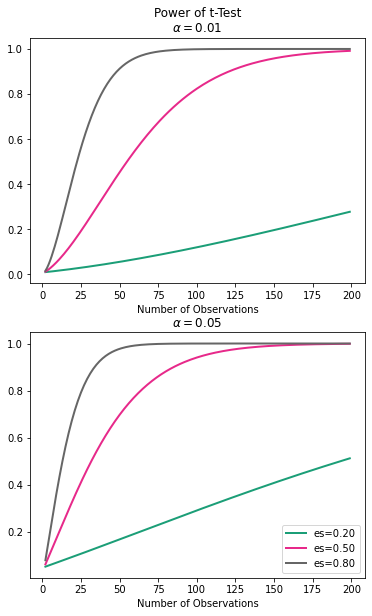

In [118]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.0)